# Malaria Datasets

The dataset contains a total of 27,558 cell images with equal instances of parasitized and uninfected cells. An instance of how the patient-ID is encoded into the cell name is shown herewith: “P1” denotes the patient-ID for the cell labeled “C33P1thinF_IMG_20150619_114756a_cell_179.png”. We have also included the CSV files containing the Patient-ID to cell mappings for the parasitized and uninfected classes. The CSV file for the parasitized class contains 151 patient-ID entries. The slide images for the parasitized patient-ID “C47P8thinOriginal” are read from two different microscope models (Olympus and Motif). The CSV file for the uninfected class contains 201 entries since the normal cells from the infected patients’ slides also make it to the normal cell category (151+50 = 201).

##Source: https://lhncbc.nlm.nih.gov/publication/pub9932

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20Deployment/Course%202%20-%20TensorFlow%20Lite/Week%202/Exercise/TFLite_Week2_Exercise_Answer.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />
    Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/lmoroney/dlaicourse/blob/master/TensorFlow%20Deployment/Course%202%20-%20TensorFlow%20Lite/Week%202/Exercise/TFLite_Week2_Exercise_Answer.ipynb">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />
    View source on GitHub</a>
  </td>
</table>

## Setup

In [ ]:
try:
    %tensorflow_version 2.x
except:
    pass
# Load the TensorBoard notebook extension.
%load_ext tensorboard

In [ ]:
from datetime import datetime
import io
import itertools
from packaging import version
from six.moves import range
import sklearn.metrics


import numpy as np
import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tqdm import tqdm

print("\u2022 Using TensorFlow Version:", tf.__version__)
print("\u2022 Using TensorFlow Hub Version: ", hub.__version__)
print('\u2022 GPU Device Found.' if tf.test.is_gpu_available() else '\u2022 GPU Device Not Found. Running on CPU')

• Using TensorFlow Version: 2.3.0
• Using TensorFlow Hub Version:  0.10.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
• GPU Device Found.


## Select the Hub/TF2 Module to Use

Hub modules for TF 1.x won't work here, please use one of the selections provided.

In [ ]:
module_selection = ("mobilenet_v2", 224, 1280) #@param ["(\"mobilenet_v2\", 224, 1280)", "(\"inception_v3\", 299, 2048)"] {type:"raw", allow-input: true}
handle_base, pixels, FV_SIZE = module_selection
MODULE_HANDLE ="https://tfhub.dev/google/tf2-preview/{}/feature_vector/4".format(handle_base)
IMAGE_SIZE = (pixels, pixels)
print("Using {} with input size {} and output dimension {}".format(MODULE_HANDLE, IMAGE_SIZE, FV_SIZE))

Using https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4 with input size (224, 224) and output dimension 1280


## Data Preprocessing

Use [TensorFlow Datasets](http://tensorflow.org/datasets) to load the cats and dogs dataset.

This `tfds` package is the easiest way to load pre-defined data. If you have your own data, and are interested in importing using it with TensorFlow see [loading image data](../load_data/images.ipynb)


In [ ]:
import tensorflow_datasets as tfds
#tfds.disable_progress_bar()

The `tfds.load` method downloads and caches the data, and returns a `tf.data.Dataset` object. These objects provide powerful, efficient methods for manipulating data and piping it into your model.

Since `"cats_vs_dog"` doesn't define standard splits, use the subsplit feature to divide it into (train, validation, test) with 80%, 10%, 10% of the data respectively.

In [ ]:
import urllib3
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)
#splits = tfds.Split.(weighted=(80, 10, 10))

splits, info = tfds.load('malaria', with_info=True, as_supervised=True, split = ['train[:60%]' ,'train[60%:80%]' ,'train[80%:]'])







Shuffling and writing examples to /root/tensorflow_datasets/malaria/1.0.0.incomplete77MVDE/malaria-train.tfrecord


Dataset malaria downloaded and prepared to /root/tensorflow_datasets/malaria/1.0.0. Subsequent calls will reuse this data.


In [ ]:
(train_examples, validation_examples, test_examples) = splits

In [ ]:
num_examples = info.splits['train'].num_examples
num_classes = info.features['label'].num_classes




print(num_classes)

2


In [ ]:
class_names = np.array(info.features['label'].names)

In [ ]:
print(class_names)

['parasitized' 'uninfected']


In [ ]:
from collections import Counter
import pandas  as pd

counts =[]

for _ , train_labels in train_examples.take(30000):
  counts.append(train_labels.numpy())
a = dict(Counter(counts))

 


In [ ]:
print(a)

{1: 8293, 0: 8242}


In [ ]:
class_weight = {0: 2.5,
                1: 0.7,
                2: 1.4,
                3: 0.4,
                4: 3.5}


['parasitized' 'uninfected']


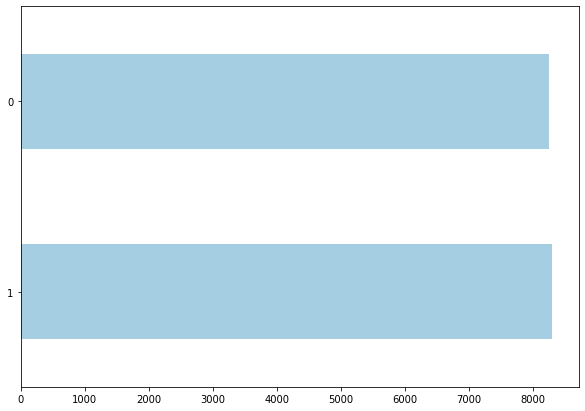

In [ ]:
df_dis = pd.DataFrame.from_dict(a , orient='index')
df_dis.plot.barh(figsize = (10,7) , legend =False, colormap='Paired' )

print(class_names)

In [ ]:
counts =[]

for _ , train_labels in validation_examples.take(30000):
  counts.append(train_labels.numpy())
a = dict(Counter(counts))

['parasitized' 'uninfected']


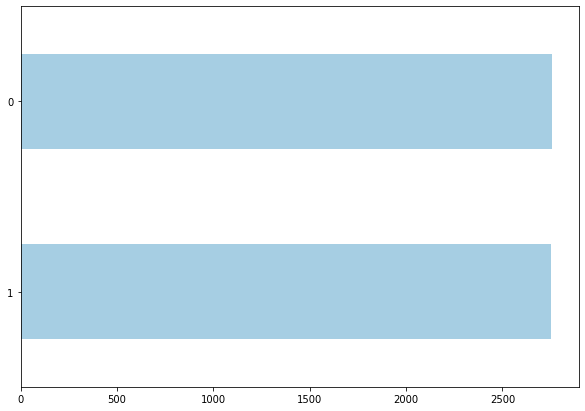

In [ ]:
df_dis = pd.DataFrame.from_dict(a , orient='index')
df_dis.plot.barh(figsize = (10,7) , legend =False, colormap='Paired' )

print(class_names)

In [ ]:
counts =[]

for _ , train_labels in test_examples.take(30000):
  counts.append(train_labels.numpy())
a = dict(Counter(counts))


['parasitized' 'uninfected']


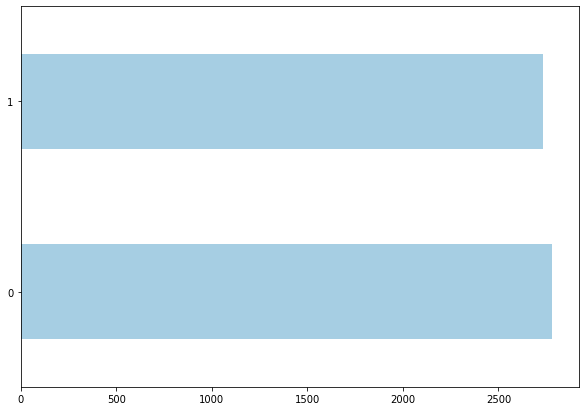

In [ ]:
df_dis = pd.DataFrame.from_dict(a , orient='index')
df_dis.plot.barh(figsize = (10,7) , legend =False, colormap='Paired' )

print(class_names)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline



tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)


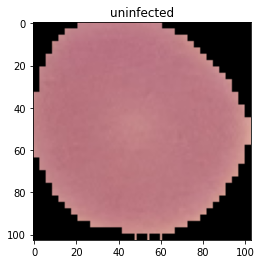

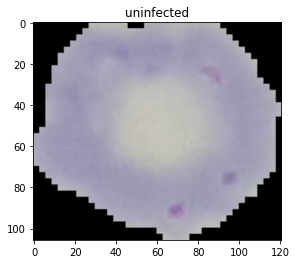

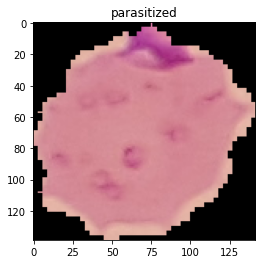

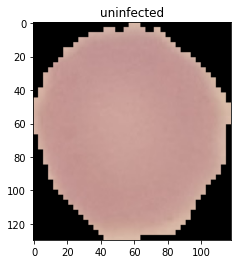

In [ ]:
get_label_name = info.features['label'].int2str
#for i in range(num_classes):
 #print(get_label_name(i))

#f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
for image, label in train_examples.take(4):
  #print(image.shape)
  gray = cv2.cvtColor(image.numpy(), cv2.COLOR_RGB2GRAY)
  # Try Canny using "wide" and "tight" thresholds
  #wide = cv2.Canny(gray, 30, 100)
  #tight = cv2.Canny(gray, 200, 240)
 
  #ax1.set_title('wide')
  #ax1.imshow(wide, cmap='gray')

  #ax2.set_title('tight')
  #ax2.imshow(tight, cmap='gray')
    
# Display the images


  plt.figure()
  plt.imshow(image)
  print(label)
  plt.title(get_label_name(label))

In [ ]:
train_label = [ label for image, label in train_examples]

In [ ]:

#print(train_images)

# Clear out prior logging data.
!rm -rf logs/plots

logdir = "logs/plots/" + datetime.now().strftime("%Y%m%d-%H%M%S")
file_writer = tf.summary.create_file_writer(logdir)

def plot_to_image(figure):
  """Converts the matplotlib plot specified by 'figure' to a PNG image and
  returns it. The supplied figure is closed and inaccessible after this call."""
  # Save the plot to a PNG in memory.
  buf = io.BytesIO()
  plt.savefig(buf, format='png')
  # Closing the figure prevents it from being displayed directly inside
  # the notebook.
  plt.close(figure)
  buf.seek(0)
  # Convert PNG buffer to TF image
  image = tf.image.decode_png(buf.getvalue(), channels=4)
  # Add the batch dimension
  image = tf.expand_dims(image, 0)
  return image

def image_grid():
  """Return a 5x5 grid of the MNIST images as a matplotlib figure."""
  # Create a figure to contain the plot.
  figure = plt.figure(figsize=(20,20))
  for i in range(25):
    # Start next subplot.
    plt.subplot(5, 5, i + 1, title=class_names[train_label[i]])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow([image for image, label in train_examples.take(28)][i] )
  
  return figure

# Prepare the plot
figure = image_grid()
# Convert to image and log
with file_writer.as_default():
  tf.summary.image("Training data", plot_to_image(figure), step=0)

#

In [ ]:
%tensorboard --logdir logs/plots

### Format the Data

Use the `tf.image` module to format the images for the task.

Resize the images to a fixes input size, and rescale the input channels

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
  tf.keras.layers.experimental.preprocessing.RandomContrast(),
  tf.keras.layers.experimental.preprocessing.RandomZoom(),
  tf.keras.layers.experimental.preprocessing.RandomTranslation()
])

In [ ]:
def format_image(image, label):
    image = tf.cast(image, tf.float32)
    #image = tf.image.grayscale_to_rgb(image)
    image = tf.image.resize(image, IMAGE_SIZE , preserve_aspect_ratio=False)
    #image = tf.image.random_brightness(image, max_delta = 0.3)
    #image = tf.image.random_contrast(image, 0.2, 0.5)
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    print(image.get_shape)
   
    return  image, label

def format_image_valid(image, label):
    image = tf.cast(image, tf.float32)
    #image = tf.image.grayscale_to_rgb(image)
    image = tf.image.resize(image, IMAGE_SIZE , preserve_aspect_ratio=False)
    print(image.get_shape)
    return  image, label

Now shuffle and batch the data


In [ ]:
BATCH_SIZE =  16#@param {type:"integer"}

In [ ]:
train_batches = train_examples.shuffle(1000).map(format_image).batch(BATCH_SIZE).prefetch(1)


validation_batches = validation_examples.map(format_image_valid).batch(BATCH_SIZE).prefetch(1)

cm_validation_batches = validation_examples.map(format_image_valid).batch(2160).prefetch(1)


test_batches =       test_examples.map(format_image_valid).batch(32).prefetch(1)

<bound method Tensor.get_shape of <tf.Tensor 'random_flip_up_down/Identity:0' shape=(224, 224, 3) dtype=float32>>
<bound method Tensor.get_shape of <tf.Tensor 'resize/Squeeze:0' shape=(224, 224, 3) dtype=float32>>
<bound method Tensor.get_shape of <tf.Tensor 'resize/Squeeze:0' shape=(224, 224, 3) dtype=float32>>
<bound method Tensor.get_shape of <tf.Tensor 'resize/Squeeze:0' shape=(224, 224, 3) dtype=float32>>


In [ ]:
test_batches =       test_examples.map(format_image).batch(32).prefetch(1)

<bound method Tensor.get_shape of <tf.Tensor 'random_flip_up_down/Identity:0' shape=(224, 224, 3) dtype=float32>>


In [ ]:
print(0.90*2400)

Inspect a batch

In [ ]:
for image_batch, label_batch in train_batches.take(1):
    pass

image_batch.shape

In [ ]:

a,  = cm_validation_batches.take(1)
im , l = a[0], a[1]




print(im.shape)

In [ ]:
from matplotlib.colors import Normalize
import matplotlib.cm  as cm


def class_distribution(train_examples , validation_examples , test_examples):
        train_label_plot = [ label for image, label in train_examples]
        valid_label_plot = [ label for image, label in validation_examples]
        test_label_plot = [ label for image, label in test_examples]
        unique, counts = np.unique(train_label_plot, return_counts=True)
        #print(unique)

        my_cmap = cm.get_cmap('jet')
        plt.figure(figsize=(20,70))
        # Get normalize function (takes data in range [vmin, vmax] -> [0, 1])
        my_norm = Normalize(vmin=0, vmax=196)
        plt.barh(unique, counts ,color=my_cmap(my_norm(unique)))

        plt.yticks(unique, class_names)
        plt.title('Class Frequency')
        plt.xlabel('Class')
        plt.ylabel('Frequency')
        plt.show()

        fig = plt.gcf

        return fig

class_distribution(train_examples , validation_examples , test_examples)

## Defining the Model

All it takes is to put a linear classifier on top of the `feature_extractor_layer` with the Hub module.

For speed, we start out with a non-trainable `feature_extractor_layer`, but you can also enable fine-tuning for greater accuracy.

In [ ]:
do_fine_tuning = True #@param {type:"boolean"}

In [ ]:
feature_extractor = hub.KerasLayer(MODULE_HANDLE,
                                   input_shape=IMAGE_SIZE + (3,), 
                                   output_shape=[FV_SIZE],
                                   trainable=do_fine_tuning)


In [ ]:
print("Building model with", MODULE_HANDLE)

model = tf.keras.Sequential([
        tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(224,224 ,3)),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.4),
        tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
        feature_extractor,
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.summary()

Building model with https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
random_rotation_1 (RandomRot (None, 224, 224, 3)       0         
_________________________________________________________________
random_zoom_1 (RandomZoom)   (None, 224, 224, 3)       0         
_________________________________________________________________
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                12810     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 22        
Total params: 2,270,816
Trainable

In [ ]:
#@title (Optional) Unfreeze some layers
NUM_LAYERS = 1 #@param {type:"slider", min:1, max:50, step:1}
      
if do_fine_tuning:
    feature_extractor.trainable = False
    
    for layer in model.layers[-NUM_LAYERS:]:
        layer.trainable = True

else:
    feature_extractor.trainable = False

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
random_rotation_1 (RandomRot (None, 224, 224, 3)       0         
_________________________________________________________________
random_zoom_1 (RandomZoom)   (None, 224, 224, 3)       0         
_________________________________________________________________
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                12810     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 22        
Total params: 2,270,816
Trainable params: 12,832
Non-trainable params: 2,257,984
_______________________________________

## Training the Model

In [ ]:
if do_fine_tuning:
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.02),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])
else:
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.002),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=0.0001)
early_stop_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5 , mode = 'min')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
random_rotation_1 (RandomRot (None, 224, 224, 3)       0         
_________________________________________________________________
random_zoom_1 (RandomZoom)   (None, 224, 224, 3)       0         
_________________________________________________________________
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                12810     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 22        
Total params: 2,270,816
Trainable params: 12,832
Non-trainable params: 2,257,984
_______________________________________

In [ ]:
!rm -rf logs/image

logdir = "logs/image/" + datetime.now().strftime("%Y%m%d-%H%M%S")
# Define the basic TensorBoard callback.
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
file_writer_cm = tf.summary.create_file_writer(logdir + '/cm')
file_writer_roc = tf.summary.create_file_writer(logdir + '/roc')

In [ ]:
def plot_confusion_matrix(cm, class_names):
  """
  Returns a matplotlib figure containing the plotted confusion matrix.

  Args:
    cm (array, shape = [n, n]): a confusion matrix of integer classes
    class_names (array, shape = [n]): String names of the integer classes
  """
  figure = plt.figure(figsize=(8, 8))
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
  plt.title("Confusion matrix")
  plt.colorbar()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names, rotation=45)
  plt.yticks(tick_marks, class_names)

  # Normalize the confusion matrix.
  cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)

  # Use white text if squares are dark; otherwise black.
  threshold = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    color = "white" if cm[i, j] > threshold else "black"
    plt.text(j, i, cm[i, j], horizontalalignment="center", color=color)

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  return figure

In [ ]:

def log_confusion_matrix(epoch, logs):
  # Use the model to predict the values from the validation dataset.
  test_pred_raw = model.predict(im)
  test_pred = np.argmax(test_pred_raw, axis=1)

      # Calculate the confusion matrix.
  cm = sklearn.metrics.confusion_matrix(l, test_pred)
  # Log the confusion matrix as an image summary.
  figure = plot_confusion_matrix(cm, class_names=class_names)
  cm_image = plot_to_image(figure)

  # Log the confusion matrix as an image summary.
  with file_writer_cm.as_default():
    tf.summary.image("Confusion Matrix", cm_image, step=epoch)

# Define the per-epoch callback.
cm_callback = tf.keras.callbacks.LambdaCallback(on_epoch_end=log_confusion_matrix)

In [ ]:
!pip install scikit-plot

In [ ]:
import scikitplot as skplt

def plot_roc(y_true, y_probas):
  #figure = plt.figure(figsize=(8, 8))
  figure, axes = plt.subplots(1,1, figsize = (8,8))

  skplt.metrics.plot_roc_curve(y_true, y_probas , ax =axes ,text_fontsize ='small', figsize= (8 ,8))
  plt.title('ROC')
  #plt.colorbar()
  plt.ylabel('True Label')
  plt.xlabel('Predicated Label')
  fig = plt.gcf()
  #plt.show()
  fig.savefig("test_rasterization.png", dpi=150)
  #print(fig)
  

  return fig

In [ ]:
def log_roc(epoch, logs):
  test_pred_raw = model.predict(im)
  test_pred = np.argmax(test_pred_raw, axis=1)
  #print(test_pred.shape)
  #print(l.shape)
  figure_roc = plot_roc(l, test_pred_raw)
  roc_image = plot_to_image(figure_roc)


  # Log the roc  as an image summary.
  with file_writer_roc.as_default():
    tf.summary.image("ROC", roc_image, step=epoch)

roc_callback = tf.keras.callbacks.LambdaCallback( on_epoch_end=log_roc)



```
# learning rate dense nodes accuacy 
#  0.0002           101      16%
#  0.002            1280     15%
```



In [ ]:
EPOCHS = 30
# Start TensorBoard.


#%tensorboard --logdir logs/



hist = model.fit(train_batches,
                 epochs=EPOCHS,
                 #callbacks =[tensorboard_callback,reduce_lr],
                 validation_data=validation_batches,
                 #class_weight= class_weight))
                 #callbacks=[tensorboard_callback])
)

Epoch 1/30
1034/1034 [==============================] - 36s 34ms/step - loss: 0.3172 - accuracy: 0.8809 - val_loss: 0.2222 - val_accuracy: 0.9182
Epoch 2/30
1034/1034 [==============================] - 35s 34ms/step - loss: 0.2453 - accuracy: 0.9115 - val_loss: 0.2177 - val_accuracy: 0.9220
Epoch 3/30
1034/1034 [==============================] - 35s 34ms/step - loss: 0.2386 - accuracy: 0.9135 - val_loss: 0.2104 - val_accuracy: 0.9249
Epoch 4/30
1034/1034 [==============================] - 35s 33ms/step - loss: 0.2365 - accuracy: 0.9188 - val_loss: 0.2022 - val_accuracy: 0.9298
Epoch 5/30
1034/1034 [==============================] - 34s 33ms/step - loss: 0.2369 - accuracy: 0.9182 - val_loss: 0.1958 - val_accuracy: 0.9329
Epoch 6/30
1034/1034 [==============================] - 34s 33ms/step - loss: 0.2360 - accuracy: 0.9182 - val_loss: 0.2487 - val_accuracy: 0.9053
Epoch 7/30
1034/1034 [==============================] - 34s 33ms/step - loss: 0.2348 - accuracy: 0.9202 - val_loss: 0.2432 -

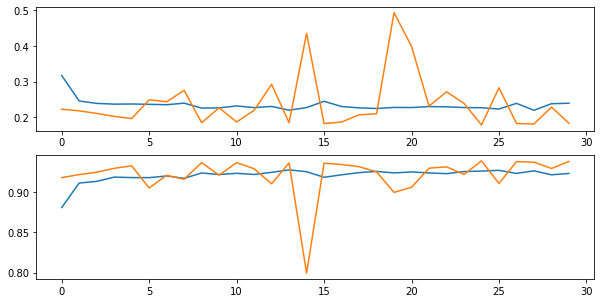

In [ ]:
from matplotlib import pyplot as plt




fig, axs = plt.subplots(2, 1 , figsize=(10,5))
#axs[0, 0].plot(x, y)
##axs[0, 0].set_title('Axis [0, 0]')
#axs[0, 1].plot(x, y, 'tab:orange')
#axs[0, 1].set_title('Axis [0, 1]')
#axs[1, 0].plot(x, -y, 'tab:green')
#axs[1, 0].set_title('Axis [1, 0]')
#axs[1, 1].plot(x, -y, 'tab:red')
#axs[1, 1].set_title('Axis [1, 1]')



#plt.yscale('log')
axs[0].plot(hist.history['loss'])
axs[0].plot(hist.history['val_loss'])
axs[1].plot(hist.history['accuracy'])
axs[1].plot(hist.history['val_accuracy'])


In [ ]:
model.evaluate(validation_batches.take(3000))

345/345 [==============================] - 7s 21ms/step - loss: 0.1828 - accuracy: 0.9383


[0.18280833959579468, 0.9383051991462708]

In [ ]:
model.evaluate(test_batches.take(3000))

173/173 [==============================] - 7s 38ms/step - loss: 0.1867 - accuracy: 0.9387


[0.18672461807727814, 0.9386792182922363]

In [ ]:
predictions = []
real_label  = []
for image_batch , labels_batch in validation_batches.take(99):
  
  predictions.extend(np.argmax(model.predict(image_batch), axis =-1))
  real_label.extend(labels_batch.numpy())

['parasitized' 'uninfected']
{0: 2780, 1: 2732}


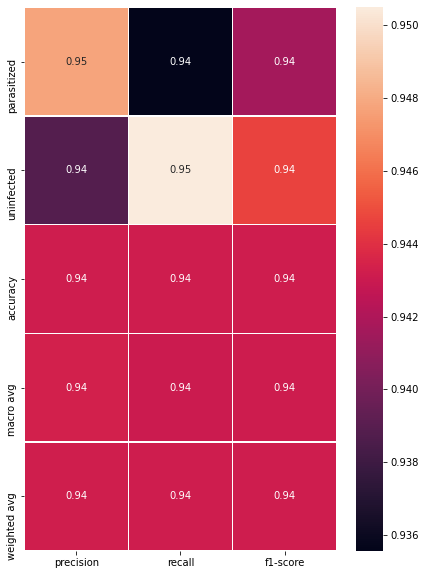

In [ ]:
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report
plt.figure(figsize = (7,10))
#print("the classification report : \n" , cl_report)
cl_report = classification_report(real_label,predictions, target_names = class_names, output_dict=True)
sns.heatmap(pd.DataFrame(cl_report).iloc[:-1, :].T, annot= True, linewidths=.5)
print(class_names)
print(a)

In [ ]:
import sklearn as sklearn
from sklearn.metrics import confusion_matrix



cm = confusion_matrix(real_label, predictions)
print(cm)

[[726  50]
 [ 40 768]]


In [ ]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=90)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

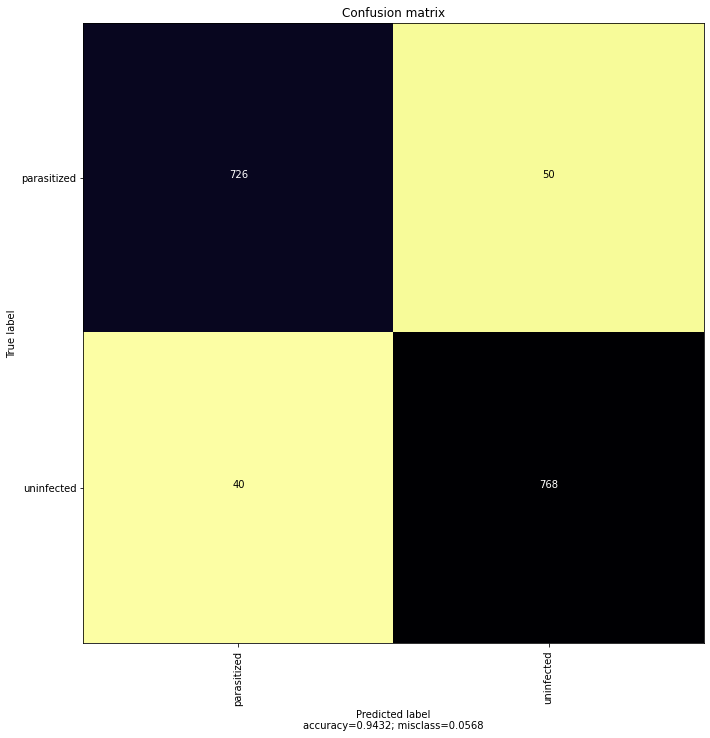

In [ ]:
plot_confusion_matrix(cm = cm,
                          target_names= class_names,
                          title='Confusion matrix',
                          cmap='inferno_r',
                          normalize=False)

In [ ]:
CLS = class_names

In [ ]:


def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img.numpy().astype("uint8"))

  predicted_label = np.argmax(predictions_array)
  #print(predicted_label)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(CLS[predicted_label],
                                100*np.max(predictions_array),
                                CLS[true_label]),
                                color=color)







def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(2) , rotation =90)
  plt.yticks([])
  thisplot = plt.bar(range(2), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  #print(predicted_label)
  #print(true_label)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [ ]:


for imgs , lbs in test_batches.take(1):
  
  pred = model.predict(imgs)
  

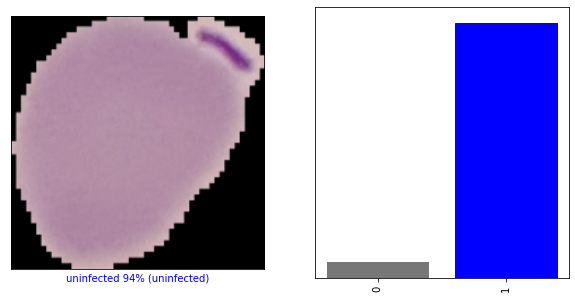

In [ ]:

i = 2
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)



plot_image(i, pred[i], lbs, imgs)
plt.subplot(1,2,2)
plot_value_array(i, pred[i],  lbs)
plt.show()

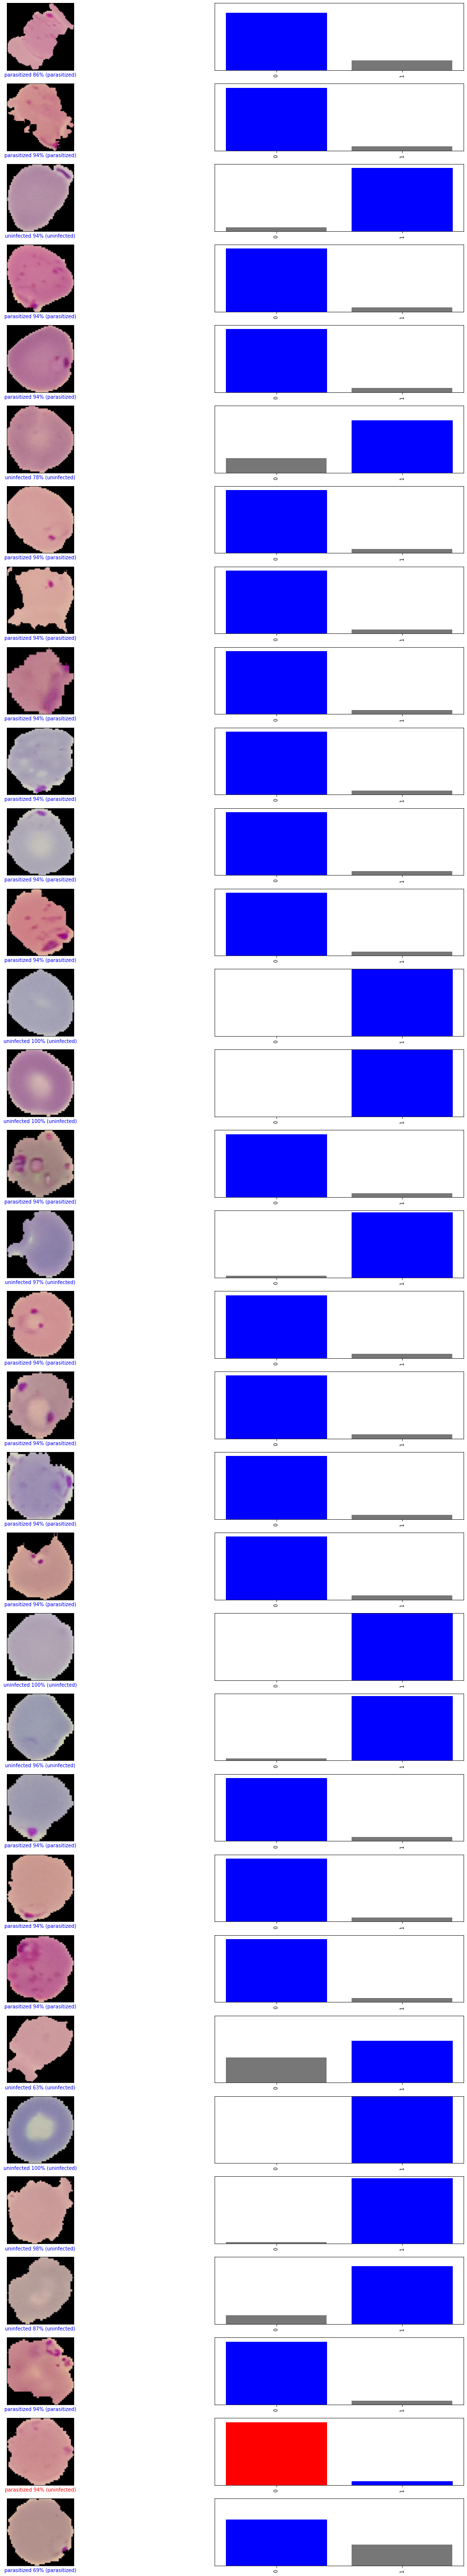

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 32
num_cols = 1
num_images = num_rows*num_cols
plt.figure(figsize=(10*2*num_cols, 3*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, pred[i], lbs, imgs)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, pred[i], lbs)

plt.show()


In [ ]:
!wget ftp://lhcftp.nlm.nih.gov/Open-Access-Datasets/Malaria/cell_images.zip

--2020-11-19 22:02:31--  ftp://lhcftp.nlm.nih.gov/Open-Access-Datasets/Malaria/cell_images.zip
           => ‘cell_images.zip’
Resolving lhcftp.nlm.nih.gov (lhcftp.nlm.nih.gov)... 130.14.55.35, 2607:f220:41e:7055::35
Connecting to lhcftp.nlm.nih.gov (lhcftp.nlm.nih.gov)|130.14.55.35|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /Open-Access-Datasets/Malaria ... done.
==> SIZE cell_images.zip ... 353452851
==> PASV ... done.    ==> RETR cell_images.zip ... done.
Length: 353452851 (337M) (unauthoritative)

cell_images.zip     100%[===================>] 337.08M  58.8MB/s    in 5.4s    

2020-11-19 22:02:37 (62.2 MB/s) - ‘cell_images.zip’ saved [353452851]



In [ ]:
!unzip cell_images.zip

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from IPython.display import Image

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import mobilenet_v2

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
random_rotation_1 (RandomRot (None, 224, 224, 3)       0         
_________________________________________________________________
random_zoom_1 (RandomZoom)   (None, 224, 224, 3)       0         
_________________________________________________________________
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                12810     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 22        
Total params: 2,270,816
Trainable params: 12,832
Non-trainable params: 2,257,984
_______________________________________

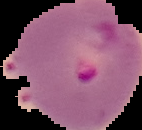

In [ ]:
# Size of the input image
img_size = (224, 224, 3)

model = model
print(model.summary())

# The local path to our target image
#img_path = keras.utils.get_file("cell.jpg", "/content/cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_144.png")
display(Image('/content/cell_images/Parasitized/C116P77ThinF_IMG_20150930_171809_cell_82.png'))

In [ ]:
def get_img_array(img_path, size=(224, 224)):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def get_gradients(img_input, top_pred_idx):
    """Computes the gradients of outputs w.r.t input image.

    Args:
        img_input: 4D image tensor
        top_pred_idx: Predicted label for the input image

    Returns:
        Gradients of the predictions w.r.t img_input
    """
    images = tf.cast(img_input, tf.float32)

    with tf.GradientTape() as tape:
        tape.watch(images)
        preds = model(images)
        top_class = preds[:, top_pred_idx]

    grads = tape.gradient(top_class, images)
    return grads


def get_integrated_gradients(img_input, top_pred_idx, baseline=None, num_steps=50):
    """Computes Integrated Gradients for a predicted label.

    Args:
        img_input (ndarray): Original image
        top_pred_idx: Predicted label for the input image
        baseline (ndarray): The baseline image to start with for interpolation
        num_steps: Number of interpolation steps between the baseline
            and the input used in the computation of integrated gradients. These
            steps along determine the integral approximation error. By default,
            num_steps is set to 50.

    Returns:
        Integrated gradients w.r.t input image
    """
    # If baseline is not provided, start with a black image
    # having same size as the input image.
    if baseline is None:
        baseline = np.zeros(img_size).astype(np.float32)
    else:
        baseline = baseline.astype(np.float32)

    # 1. Do interpolation.
    img_input = img_input.astype(np.float32)
    interpolated_image = [
        baseline + (step / num_steps) * (img_input - baseline)
        for step in range(num_steps + 1)
    ]
    interpolated_image = np.array(interpolated_image).astype(np.float32)

    # 2. Preprocess the interpolated images
    interpolated_image = xception.preprocess_input(interpolated_image)

    # 3. Get the gradients
    grads = []
    for i, img in enumerate(interpolated_image):
        img = tf.expand_dims(img, axis=0)
        grad = get_gradients(img, top_pred_idx=top_pred_idx)
        grads.append(grad[0])
    grads = tf.convert_to_tensor(grads, dtype=tf.float32)

    # 4. Approximate the integral using the trapezoidal rule
    grads = (grads[:-1] + grads[1:]) / 2.0
    avg_grads = tf.reduce_mean(grads, axis=0)

    # 5. Calculate integrated gradients and return
    integrated_grads = (img_input - baseline) * avg_grads
    return integrated_grads


def random_baseline_integrated_gradients(
    img_input, top_pred_idx, num_steps=50, num_runs=2
):
    """Generates a number of random baseline images.

    Args:
        img_input (ndarray): 3D image
        top_pred_idx: Predicted label for the input image
        num_steps: Number of interpolation steps between the baseline
            and the input used in the computation of integrated gradients. These
            steps along determine the integral approximation error. By default,
            num_steps is set to 50.
        num_runs: number of baseline images to generate

    Returns:
        Averaged integrated gradients for `num_runs` baseline images
    """
    # 1. List to keep track of Integrated Gradients (IG) for all the images
    integrated_grads = []

    # 2. Get the integrated gradients for all the baselines
    for run in range(num_runs):
        baseline = np.random.random(img_size) * 255
        igrads = get_integrated_gradients(
            img_input=img_input,
            top_pred_idx=top_pred_idx,
            baseline=baseline,
            num_steps=num_steps,
        )
        integrated_grads.append(igrads)

    # 3. Return the average integrated gradients for the image
    integrated_grads = tf.convert_to_tensor(integrated_grads)
    return tf.reduce_mean(integrated_grads, axis=0)





    


In [ ]:
class GradVisualizer:
    """Plot gradients of the outputs w.r.t an input image."""

    def __init__(self, positive_channel=None, negative_channel=None):
        if positive_channel is None:
            self.positive_channel = [0, 0, 225]
        else:
            self.positive_channel = positive_channel

        if negative_channel is None:
            self.negative_channel = [255, 0, 0]
        else:
            self.negative_channel = negative_channel

    def apply_polarity(self, attributions, polarity):
        if polarity == "positive":
            return np.clip(attributions, 0, 1)
        else:
            return np.clip(attributions, -1, 0)

    def apply_linear_transformation(
        self,
        attributions,
        clip_above_percentile=99.9,
        clip_below_percentile=70.0,
        lower_end=0.2,
    ):
        # 1. Get the thresholds
        m = self.get_thresholded_attributions(
            attributions, percentage=100 - clip_above_percentile
        )
        e = self.get_thresholded_attributions(
            attributions, percentage=100 - clip_below_percentile
        )

        # 2. Transform the attributions by a linear function f(x) = a*x + b such that
        # f(m) = 1.0 and f(e) = lower_end
        transformed_attributions = (1 - lower_end) * (np.abs(attributions) - e) / (
            m - e
        ) + lower_end

        # 3. Make sure that the sign of transformed attributions is the same as original attributions
        transformed_attributions *= np.sign(attributions)

        # 4. Only keep values that are bigger than the lower_end
        transformed_attributions *= transformed_attributions >= lower_end

        # 5. Clip values and return
        transformed_attributions = np.clip(transformed_attributions, 0.0, 1.0)
        return transformed_attributions

    def get_thresholded_attributions(self, attributions, percentage):
        if percentage == 100.0:
            return np.min(attributions)

        # 1. Flatten the attributions
        flatten_attr = attributions.flatten()

        # 2. Get the sum of the attributions
        total = np.sum(flatten_attr)

        # 3. Sort the attributions from largest to smallest.
        sorted_attributions = np.sort(np.abs(flatten_attr))[::-1]

        # 4. Calculate the percentage of the total sum that each attribution
        # and the values about it contribute.
        cum_sum = 100.0 * np.cumsum(sorted_attributions) / total

        # 5. Threshold the attributions by the percentage
        indices_to_consider = np.where(cum_sum >= percentage)[0][0]

        # 6. Select the desired attributions and return
        attributions = sorted_attributions[indices_to_consider]
        return attributions

    def binarize(self, attributions, threshold=0.001):
        return attributions > threshold

    def morphological_cleanup_fn(self, attributions, structure=np.ones((4, 4))):
        closed = ndimage.grey_closing(attributions, structure=structure)
        opened = ndimage.grey_opening(closed, structure=structure)
        return opened

    def draw_outlines(
        self, attributions, percentage=90, connected_component_structure=np.ones((3, 3))
    ):
        # 1. Binarize the attributions.
        attributions = self.binarize(attributions)

        # 2. Fill the gaps
        attributions = ndimage.binary_fill_holes(attributions)

        # 3. Compute connected components
        connected_components, num_comp = ndimage.measurements.label(
            attributions, structure=connected_component_structure
        )

        # 4. Sum up the attributions for each component
        total = np.sum(attributions[connected_components > 0])
        component_sums = []
        for comp in range(1, num_comp + 1):
            mask = connected_components == comp
            component_sum = np.sum(attributions[mask])
            component_sums.append((component_sum, mask))

        # 5. Compute the percentage of top components to keep
        sorted_sums_and_masks = sorted(component_sums, key=lambda x: x[0], reverse=True)
        sorted_sums = list(zip(*sorted_sums_and_masks))[0]
        cumulative_sorted_sums = np.cumsum(sorted_sums)
        cutoff_threshold = percentage * total / 100
        cutoff_idx = np.where(cumulative_sorted_sums >= cutoff_threshold)[0][0]
        if cutoff_idx > 2:
            cutoff_idx = 2

        # 6. Set the values for the kept components
        border_mask = np.zeros_like(attributions)
        for i in range(cutoff_idx + 1):
            border_mask[sorted_sums_and_masks[i][1]] = 1

        # 7. Make the mask hollow and show only the border
        eroded_mask = ndimage.binary_erosion(border_mask, iterations=1)
        border_mask[eroded_mask] = 0

        # 8. Return the outlined mask
        return border_mask

    def process_grads(
        self,
        image,
        attributions,
        polarity="positive",
        clip_above_percentile=99.9,
        clip_below_percentile=0,
        morphological_cleanup=False,
        structure=np.ones((3, 3)),
        outlines=False,
        outlines_component_percentage=90,
        overlay=True,
    ):
        if polarity not in ["positive", "negative"]:
            raise ValueError(
                f""" Allowed polarity values: 'positive' or 'negative'
                                    but provided {polarity}"""
            )
        if clip_above_percentile < 0 or clip_above_percentile > 100:
            raise ValueError("clip_above_percentile must be in [0, 100]")

        if clip_below_percentile < 0 or clip_below_percentile > 100:
            raise ValueError("clip_below_percentile must be in [0, 100]")

        # 1. Apply polarity
        if polarity == "positive":
            attributions = self.apply_polarity(attributions, polarity=polarity)
            channel = self.positive_channel
        else:
            attributions = self.apply_polarity(attributions, polarity=polarity)
            attributions = np.abs(attributions)
            channel = self.negative_channel

        # 2. Take average over the channels
        attributions = np.average(attributions, axis=2)

        # 3. Apply linear transformation to the attributions
        attributions = self.apply_linear_transformation(
            attributions,
            clip_above_percentile=clip_above_percentile,
            clip_below_percentile=clip_below_percentile,
            lower_end=0.0,
        )

        # 4. Cleanup
        if morphological_cleanup:
            attributions = self.morphological_cleanup_fn(
                attributions, structure=structure
            )
        # 5. Draw the outlines
        if outlines:
            attributions = self.draw_outlines(
                attributions, percentage=outlines_component_percentage
            )

        # 6. Expand the channel axis and convert to RGB
        attributions = np.expand_dims(attributions, 2) * channel

        # 7.Superimpose on the original image
        if overlay:
            attributions = np.clip((attributions * 0.8 + image), 0, 255)
        return attributions

    def visualize(
        self,
        image,
        gradients,
        integrated_gradients,
        polarity="positive",
        clip_above_percentile=99.9,
        clip_below_percentile=0,
        morphological_cleanup=False,
        structure=np.ones((3, 3)),
        outlines=False,
        outlines_component_percentage=90,
        overlay=True,
        figsize=(15, 8),
    ):
        # 1. Make two copies of the original image
        img1 = np.copy(image)
        img2 = np.copy(image)

        # 2. Process the normal gradients
        grads_attr = self.process_grads(
            image=img1,
            attributions=gradients,
            polarity=polarity,
            clip_above_percentile=clip_above_percentile,
            clip_below_percentile=clip_below_percentile,
            morphological_cleanup=morphological_cleanup,
            structure=structure,
            outlines=outlines,
            outlines_component_percentage=outlines_component_percentage,
            overlay=overlay,
        )

        # 3. Process the integrated gradients
        igrads_attr = self.process_grads(
            image=img2,
            attributions=integrated_gradients,
            polarity=polarity,
            clip_above_percentile=clip_above_percentile,
            clip_below_percentile=clip_below_percentile,
            morphological_cleanup=morphological_cleanup,
            structure=structure,
            outlines=outlines,
            outlines_component_percentage=outlines_component_percentage,
            overlay=overlay,
        )

        _, ax = plt.subplots(1, 3, figsize=(20,20))
        ax[0].imshow(image)
        ax[1].imshow(grads_attr.astype(np.uint8))
        ax[2].imshow(igrads_attr.astype(np.uint8))

        ax[0].set_title("Input")
        ax[1].set_title("Normal gradients")
        ax[2].set_title("Integrated gradients")
        plt.show()


Predicted: tf.Tensor(0, shape=(), dtype=int64)


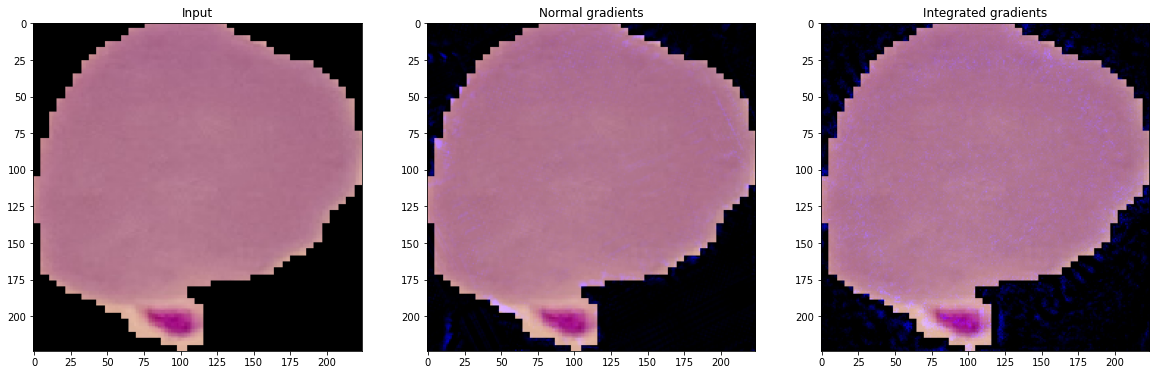

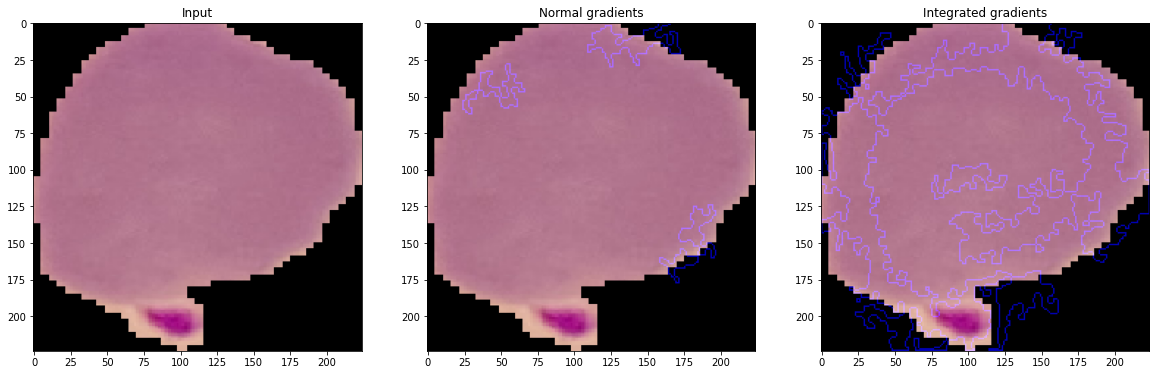

In [ ]:
# 1. Convert the image to numpy array

img = get_img_array('/content/cell_images/Parasitized/C116P77ThinF_IMG_20150930_171809_cell_70.png')

# 2. Keep a copy of the original image
orig_img = np.copy(img[0]).astype(np.uint8)

# 3. Preprocess the image
img_processed = tf.cast(mobilenet_v2.preprocess_input(img), dtype=tf.float32)

# 4. Get model predictions
preds = model.predict(img_processed)
top_pred_idx = tf.argmax(preds[0])
print("Predicted:", top_pred_idx)

# 5. Get the gradients of the last layer for the predicted label
grads = get_gradients(img_processed, top_pred_idx=top_pred_idx)

# 6. Get the integrated gradients
igrads = random_baseline_integrated_gradients(
    np.copy(orig_img), top_pred_idx=top_pred_idx, num_steps=300, num_runs=2
)

# 7. Process the gradients and plot
vis = GradVisualizer()
vis.visualize(
    image=orig_img,
    gradients=grads[0].numpy(),
    integrated_gradients=igrads.numpy(),
    clip_above_percentile=99,
    clip_below_percentile=0,
)

vis.visualize(
    image=orig_img,
    gradients=grads[0].numpy(),
    integrated_gradients=igrads.numpy(),
    clip_above_percentile=95,
    clip_below_percentile=28,
    morphological_cleanup=True,
    outlines=True,
)


## Export the Model

In [ ]:
RPS_SAVED_MODEL = "rps_saved_model"

Export the SavedModel

In [ ]:
tf.saved_model.save(model, RPS_SAVED_MODEL)

In [ ]:
%%bash -s $RPS_SAVED_MODEL
saved_model_cli show --dir $1 --tag_set serve --signature_def serving_default

In [ ]:
loaded = tf.saved_model.load(RPS_SAVED_MODEL)

In [ ]:
print(list(loaded.signatures.keys()))
infer = loaded.signatures["serving_default"]
print(infer.structured_input_signature)
print(infer.structured_outputs)

## Convert Using TFLite's Converter

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(RPS_SAVED_MODEL)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

In [ ]:
tflite_model_file = 'converted_model.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

## Test the TFLite Model Using the Python Interpreter

In [ ]:
# Load TFLite model and allocate tensors.
with open(tflite_model_file, 'rb') as fid:
    tflite_model = fid.read()
    
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]

In [ ]:
# Gather results for the randomly sampled test images
predictions = []

test_labels, test_imgs = [], []
for img, label in tqdm(test_batches.take(100)):
    interpreter.set_tensor(input_index, img)
    interpreter.invoke()
    predictions.append(interpreter.get_tensor(output_index))
    
    test_labels.append(label.numpy()[0])
    test_imgs.append(img)

In [ ]:
#@title Utility functions for plotting
# Utilities for plotting

#class_names = ['dandelion',
#'daisy',
#'tulips',
#'sunflowers',
#'roses']

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    img = np.squeeze(img)
    
    plt.imshow(img[: , : , 0], cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    
    print(type(predicted_label), type(true_label))
    
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]), color=color)

In [ ]:
#@title Visualize the outputs { run: "auto" }
index = 81 #@param {type:"slider", min:0, max:100, step:1}
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plot_image(index, predictions, test_labels, test_imgs)
plt.show()

Create a file to save the labels.

In [ ]:
with open('labels.txt', 'w') as f:
    f.write('\n'.join(class_names))

If you are running this notebook in a Colab, you can run the cell below to download the model and labels to your local disk.

**Note**: If the files do not download when you run the cell, try running the cell a second time. Your browser might prompt you to allow multiple files to be downloaded. 

In [ ]:
try:
    from google.colab import files
    files.download('converted_model.tflite')
    files.download('labels.txt')
except:
    pass

# Prepare the Test Images for Download (Optional)

This part involves downloading additional test images for the Mobile Apps only in case you need to try out more samples

In [ ]:
!mkdir -p test_images

In [ ]:
from PIL import Image

for index, (image, label) in enumerate(test_batches.take(50)):
    image = tf.cast(image * 255.0, tf.uint8)
    image = tf.squeeze(image).numpy()
    pil_image = Image.fromarray(image)
    pil_image.save('test_images/{}_{}.jpg'.format(class_names[label[0]], index))

In [ ]:
!ls test_images

In [ ]:
!zip -qq rps_test_images.zip -r test_images/

If you are running this notebook in a Colab, you can run the cell below to download the Zip file with the images to your local disk. 

**Note**: If the Zip file does not download when you run the cell, try running the cell a second time.

In [ ]:
try:
    files.download('rps_test_images.zip')
except:
    pass